In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [4]:
cd = pd.read_csv("D://assignments//assignment 5//ToyotaCorolla.csv",engine='python')

print(cd.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
cd.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
cd = cd.rename(columns = {'Age_08_04': 'Age', 'Quarterly_Tax': 'QT'}, inplace = False)

In [8]:
cd_new=cd
cd_new.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [9]:
columns_to_drop=['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar']
cd_new.drop(columns_to_drop, axis = 1, inplace= True)
cd_new.head(5)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
cd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
cd_new.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


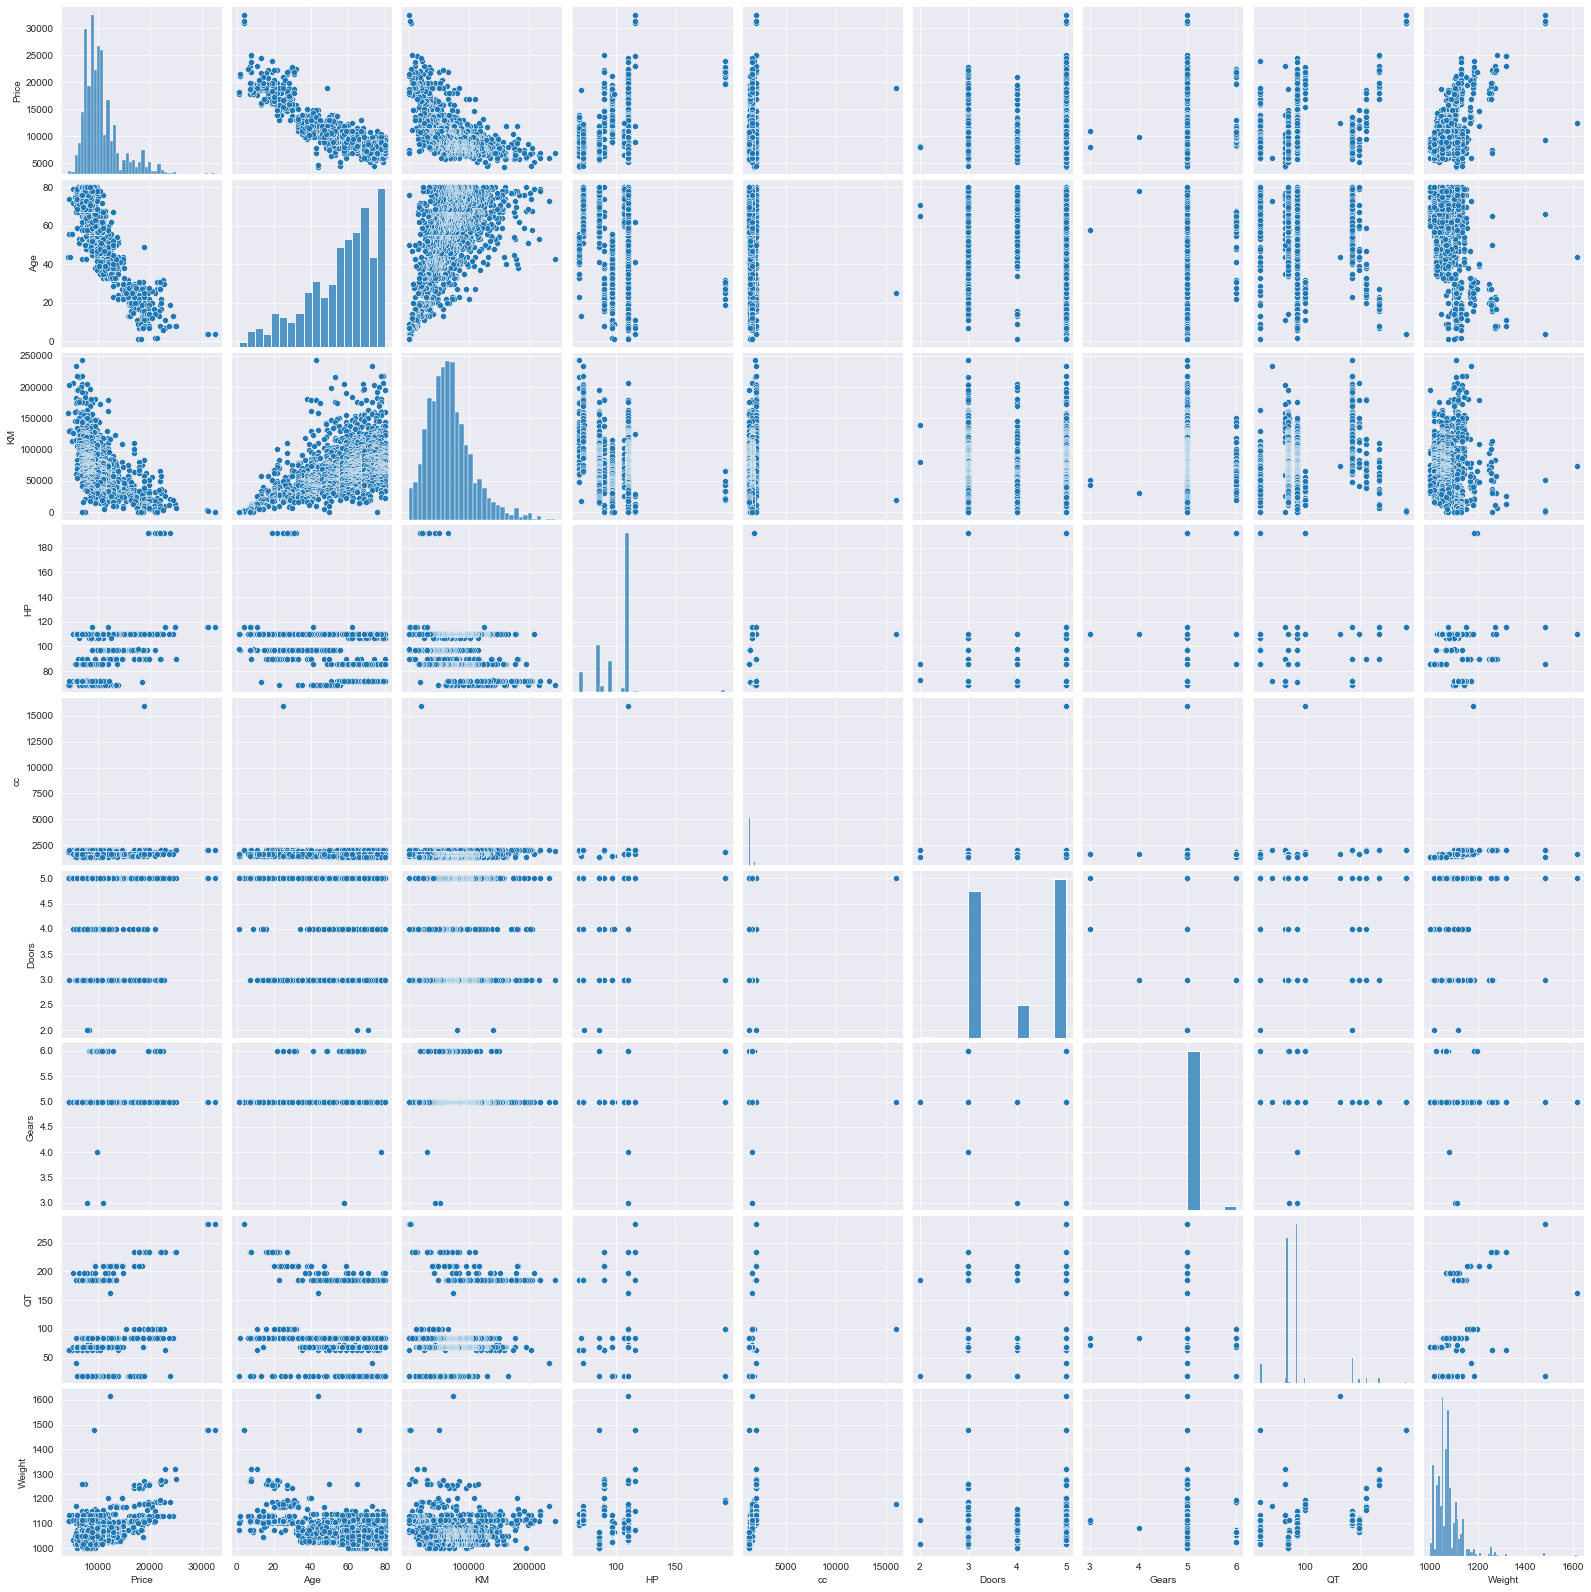

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(cd_new)

In [13]:
cd_cle1=cd_new

In [14]:
cd_cle1[cd_cle1.duplicated()].shape

(1, 9)

In [15]:
cd_cle1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
cd_cle1[cd_cle1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
cd_cle2=cd_cle1.drop_duplicates()

In [18]:
cd_cle2.shape

(1435, 9)

<AxesSubplot:>

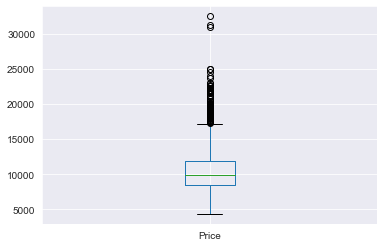

In [19]:
cd_cle2.boxplot(column=['Price'])

<AxesSubplot:>

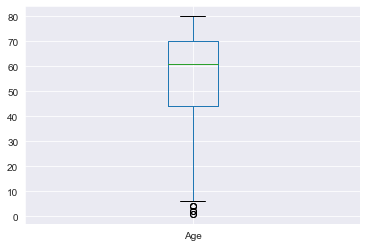

In [20]:
cd_cle2.boxplot(column=['Age'])

<AxesSubplot:>

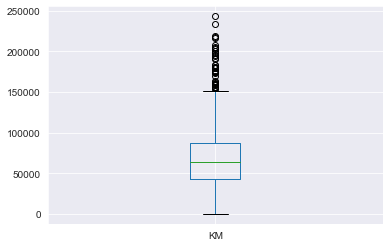

In [21]:
cd_cle2.boxplot(column=['KM'])

<AxesSubplot:>

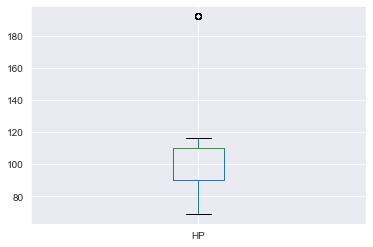

In [22]:
cd_cle2.boxplot(column=['HP'])

<AxesSubplot:>

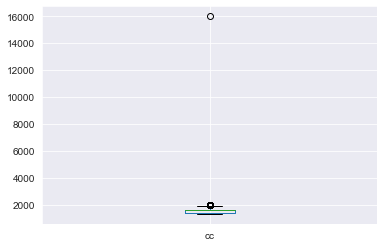

In [23]:
cd_cle2.boxplot(column=['cc'])

<AxesSubplot:>

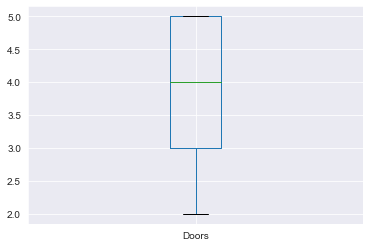

In [24]:
cd_cle2.boxplot(column=['Doors'])

<AxesSubplot:>

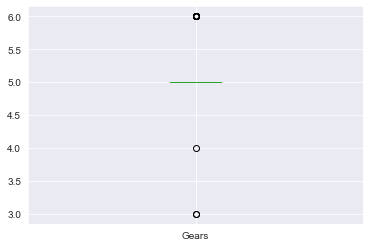

In [25]:
cd_cle2.boxplot(column=['Gears'])

<AxesSubplot:>

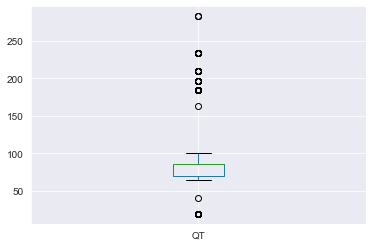

In [26]:
cd_cle2.boxplot(column=['QT'])

<AxesSubplot:>

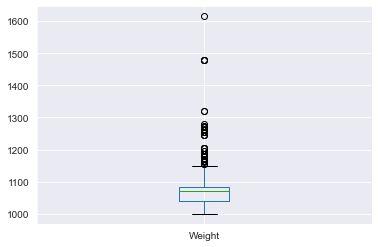

In [27]:
cd_cle2.boxplot(column=['Weight'])

<AxesSubplot:>

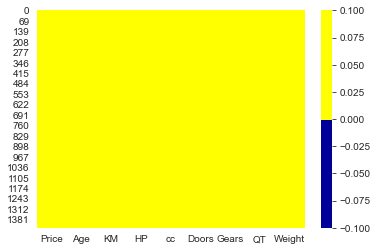

In [28]:
cols = cd_cle2.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(cd_cle2[cols].isnull(),
            cmap=sns.color_palette(colours))

In [29]:
cd_cle2[cd_cle2.isnull().any(axis=1)].head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight


In [30]:
cd_cle2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

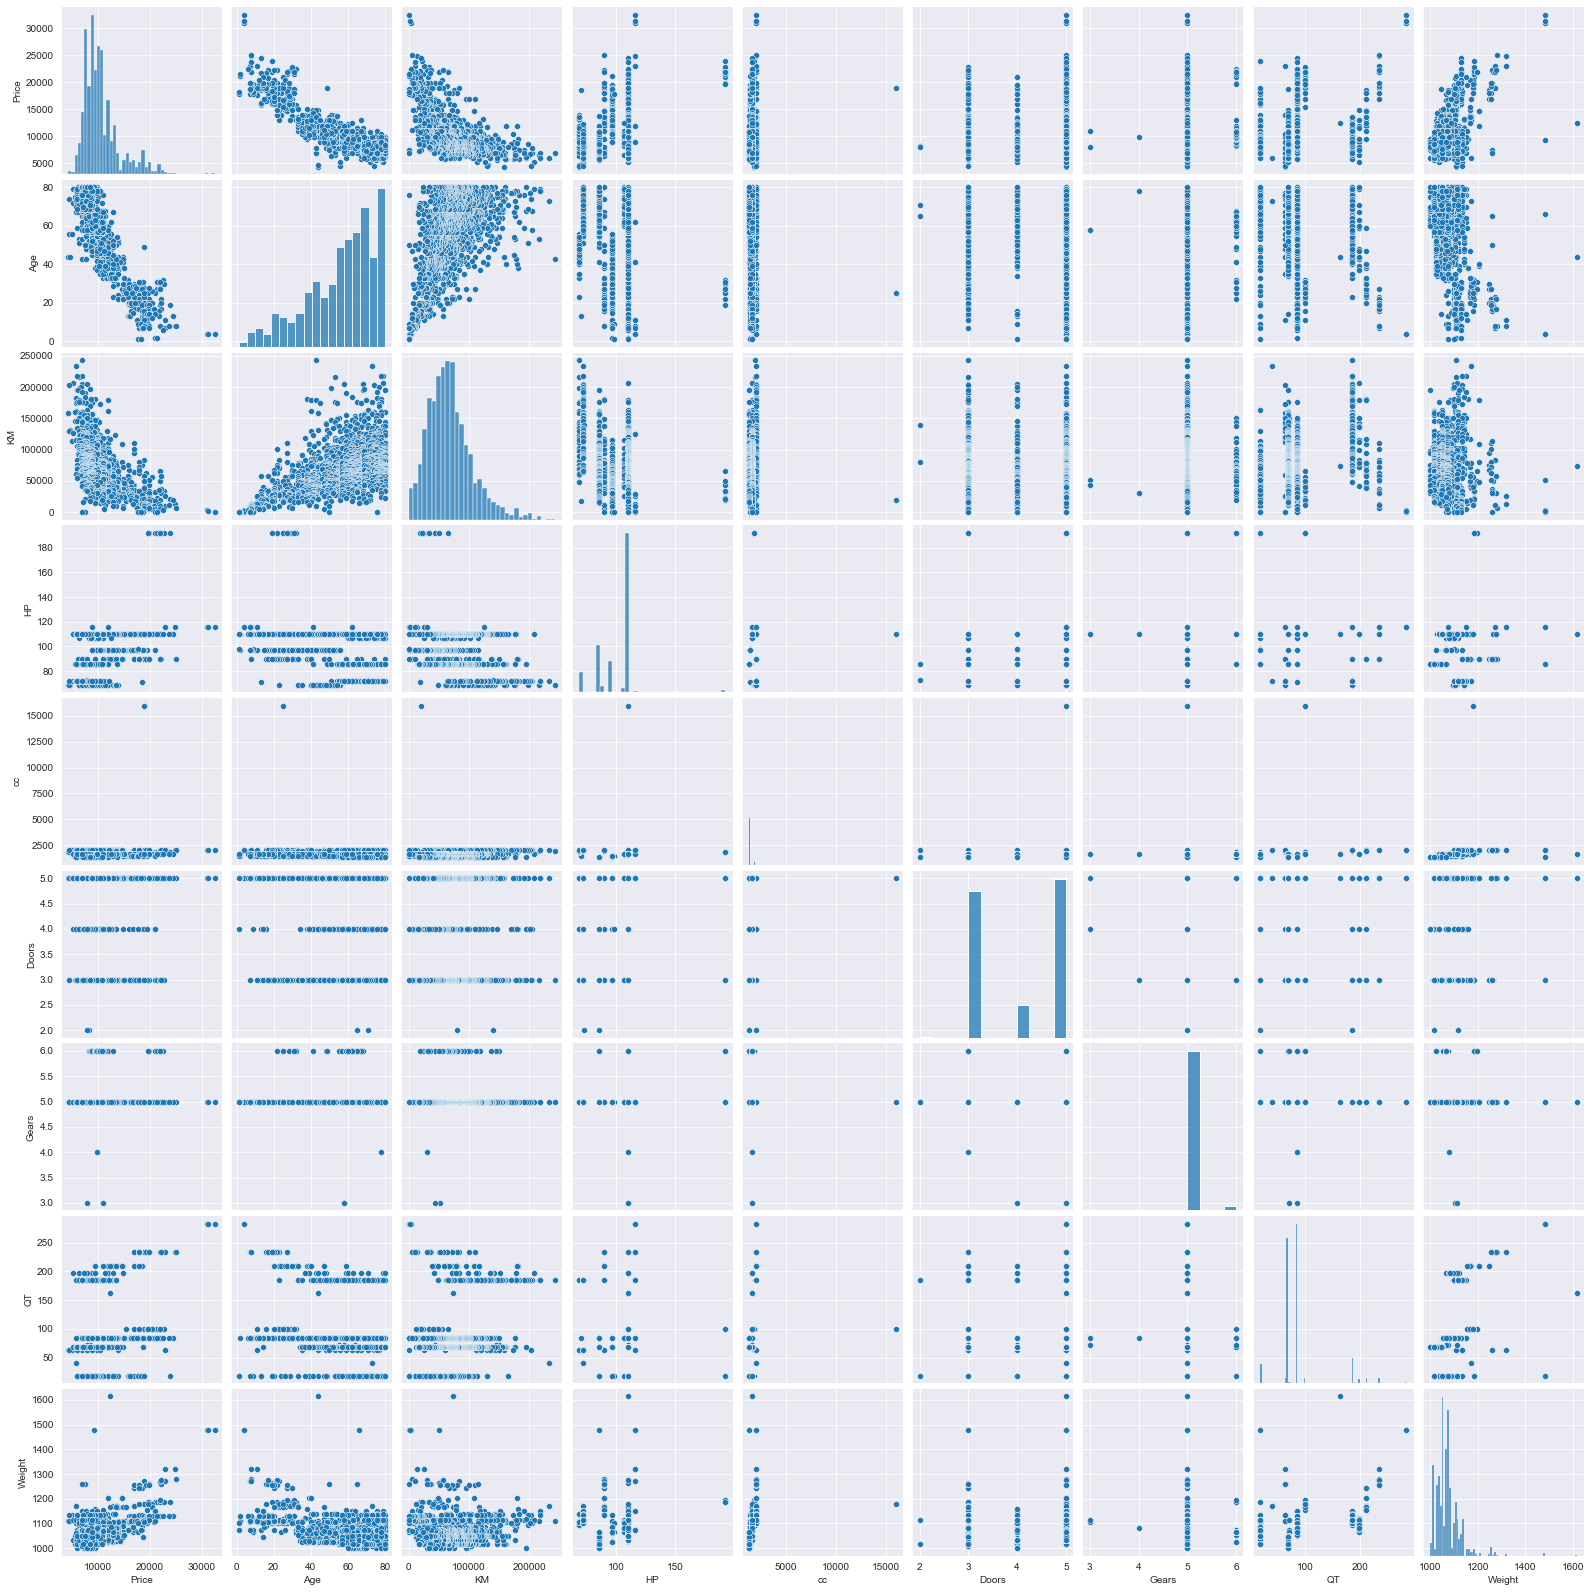

In [31]:
sns.pairplot(cd_cle2)

In [32]:
cd_cle2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
array = cd_cle2.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)


np.set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.77 -1.78 -0.58 -0.77  1.   -1.08 -0.14  3.    1.77]
 [ 0.84 -1.78  0.12 -0.77  1.   -1.08 -0.14  3.    1.77]
 [ 0.9  -1.72 -0.72 -0.77  1.   -1.08 -0.14  3.    1.77]
 [ 1.17 -1.62 -0.55 -0.77  1.   -1.08 -0.14  3.    1.77]
 [ 0.84 -1.4  -0.8  -0.77  1.   -1.08 -0.14  3.    1.87]]


In [35]:
model = smf.ols('Price~ Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cd_cle2).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:44:35   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
ml_cc=smf.ols('Price~cc',data = cd_cle2).fit()  
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [38]:
ml_d=smf.ols('Price~Doors',data = cd_cle2).fit()  
print(ml_d.tvalues, '\n', ml_d.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [39]:
ml_m=smf.ols('Price~cc+Doors',data = cd_cle2).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


In [48]:
rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=cd_cle2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Age = smf.ols('Age~cc+KM+HP+Doors+Gears+QT+Weight',data=cd_cle2).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_km = smf.ols('KM~Age+cc+HP+Doors+Gears+QT+Weight',data=cd_cle2).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=cd_cle2).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=cd_cle2).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age+KM+HP+Doors+cc+QT+Weight',data=cd_cle2).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~Age+cc+KM+Doors+Gears+HP+Weight',data=cd_cle2).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age+cc+KM+HP+Doors+Gears+QT',data=cd_cle2).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

d1 = {'Variables':['cc','Age','KM','HP','Doors','Gears','QT','Weight'],'VIF':[vif_cc,vif_Age,vif_km,vif_hp,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,cc,1.163470
1,Age,1.876236
2,KM,1.757178
3,HP,1.419180
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


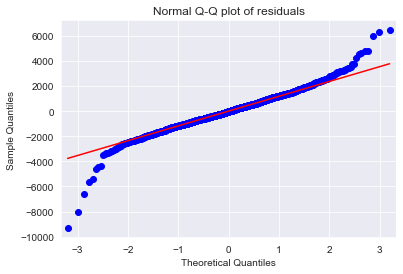

In [49]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [54]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  125,  126,
         127,  133,  135,  137,  138,  140,  141,  142,  143,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  155,  156,  157,  158,
         159,  160,  161,  162,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  189,  193,  195,  196,  200,  203,  204,  209,  210,  215,
         222,  229,  231,  232,  236, 

In [55]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

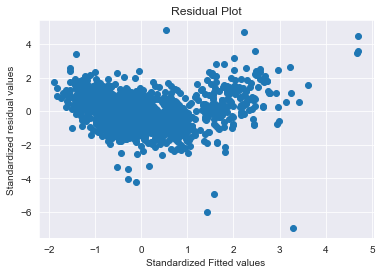

In [56]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

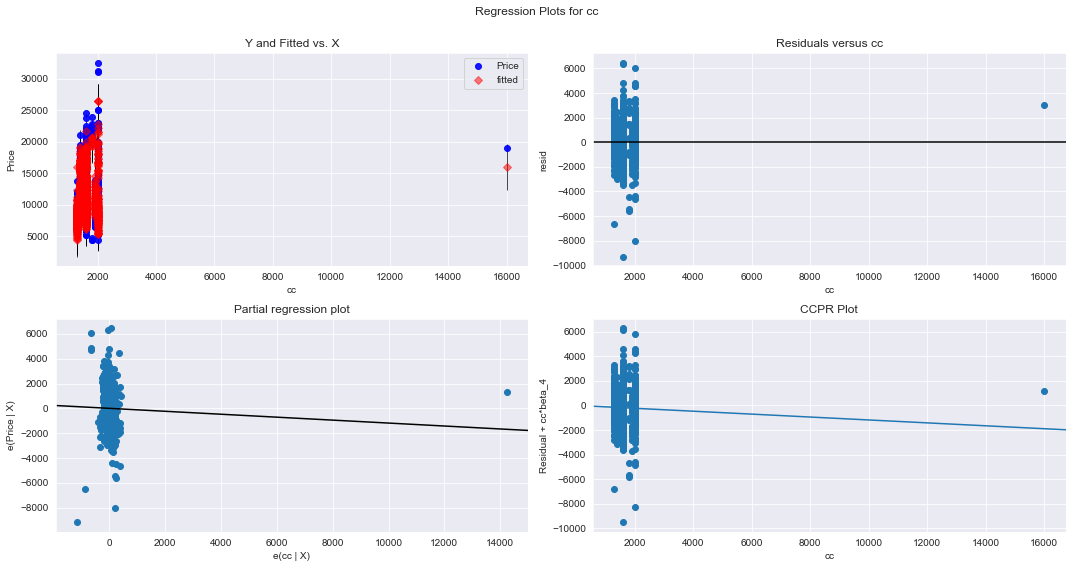

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

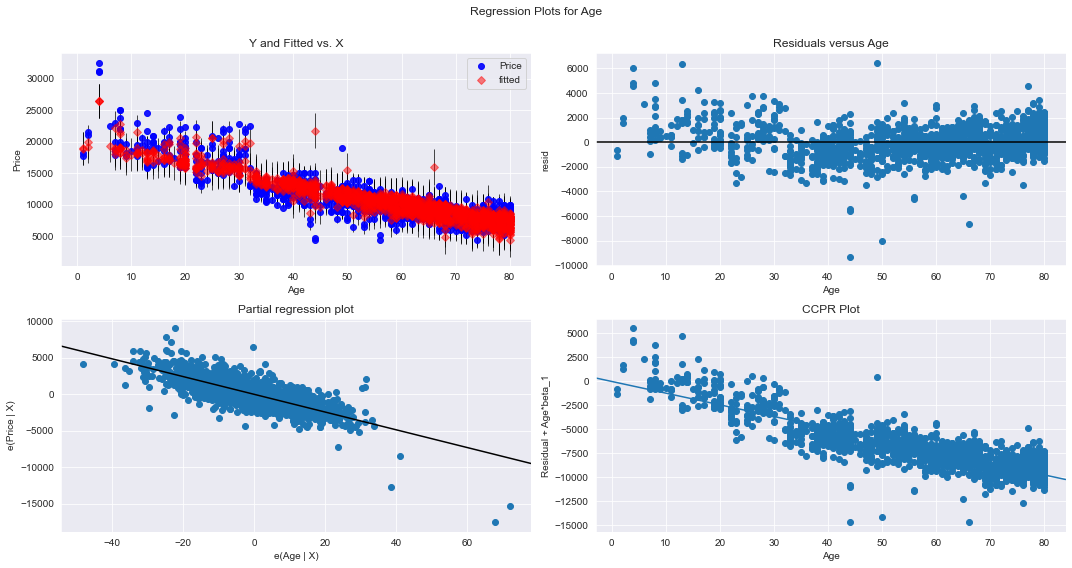

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

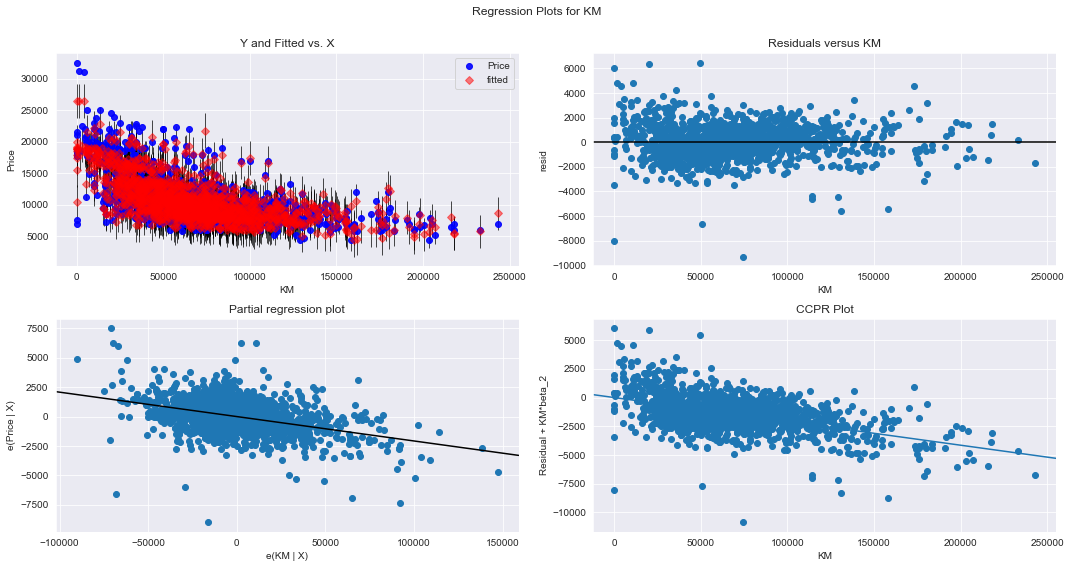

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

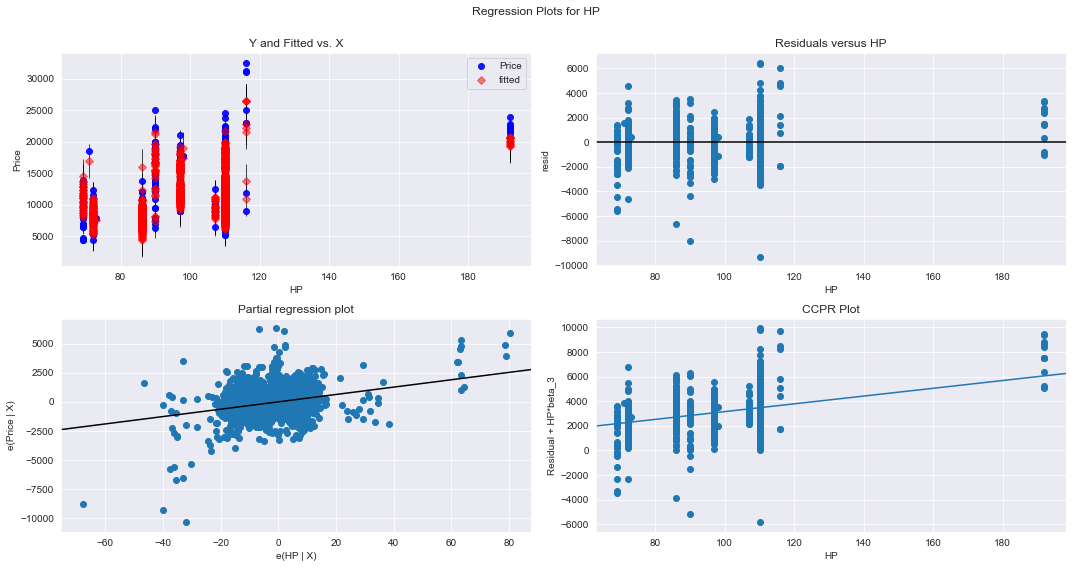

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

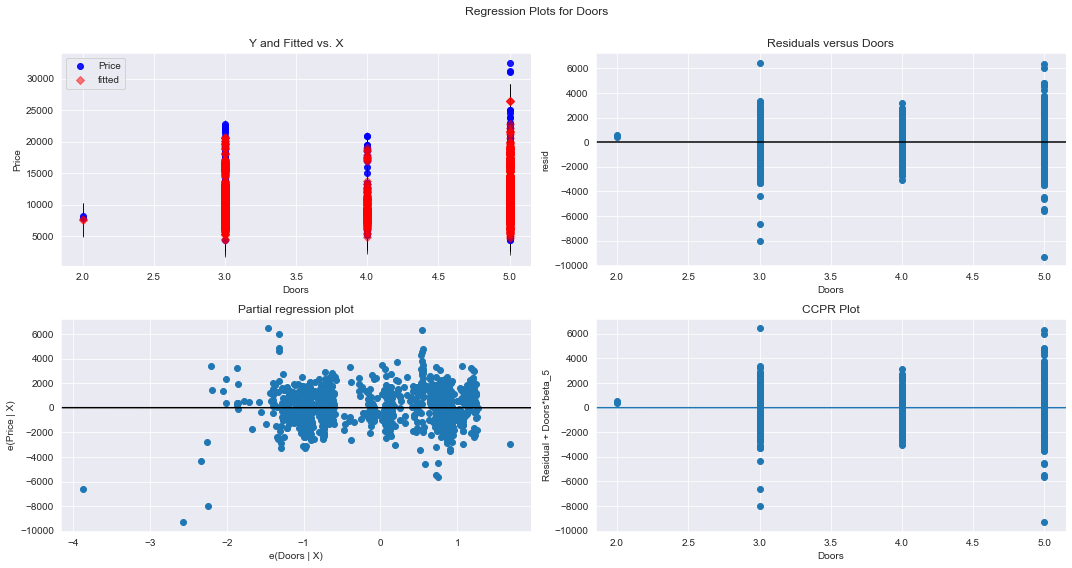

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

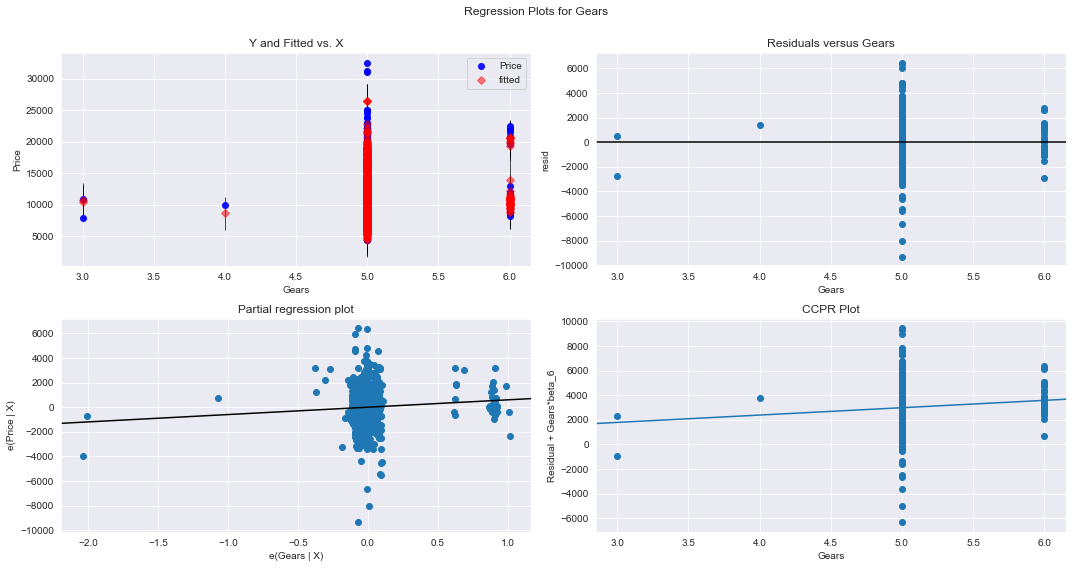

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

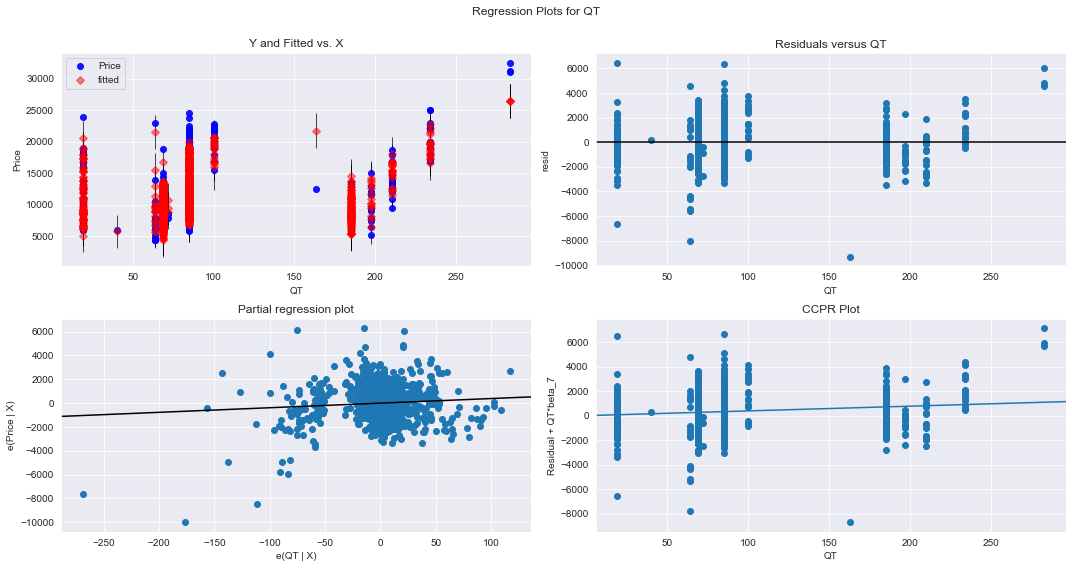

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

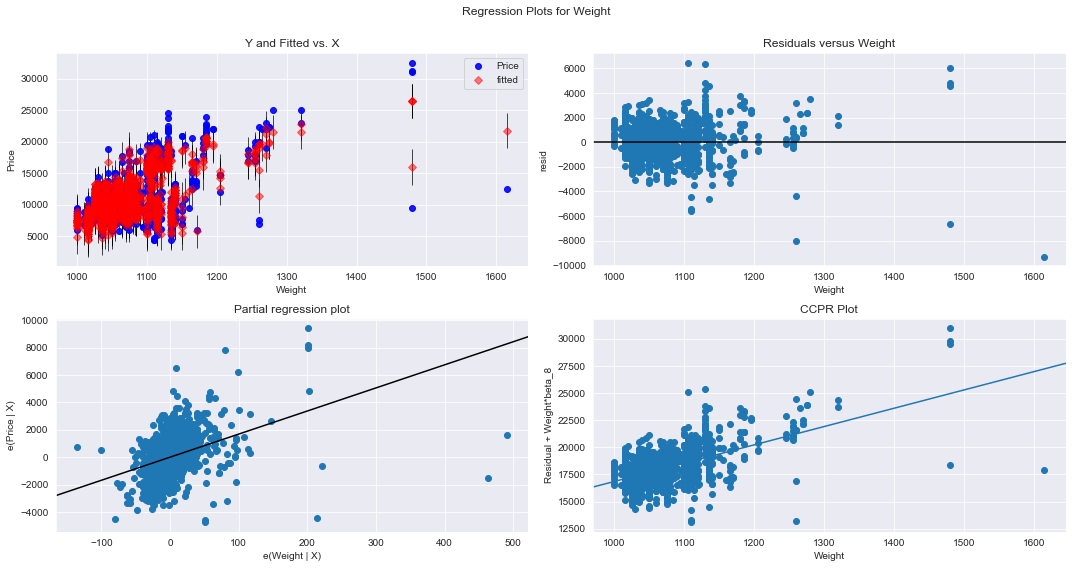

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [57]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

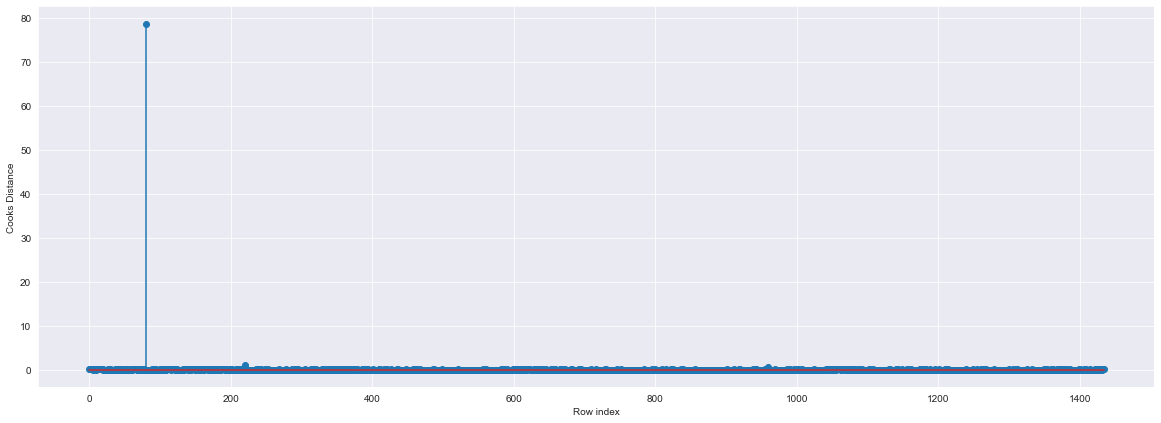

In [59]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cd_cle2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
(np.argmax(c),np.max(c))

(80, 78.7295058224984)

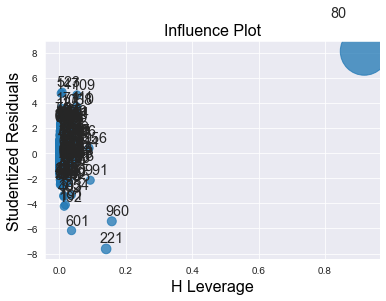

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [87]:
k = cd_cle2.shape[1]
n = cd_cle2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [63]:
cd_cle2[cd_cle2.index.isin([80,960,221])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [68]:
cd_new1=cd_cle2.drop(cd_cle2.index[[80,960,221]],axis=0).reset_index()

In [69]:
cd_new1=cd_new1.drop(['index'],axis=1)

In [70]:
cd_new1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [71]:
model1 = smf.ols('Price~ Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cd_new1).fit()

In [72]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1173.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:26:07   Log-Likelihood:                -12308.
No. Observations:                1432   AIC:                         2.463e+04
Df Residuals:                    1423   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6177.6282   1383.689     -4.465      0.000   -8891.918   -3463.338
Age         -120.5120      2.562    -47.035      0.000    -125.538    -115.486
KM            -0.0178      0.001    -13.945      0.000      -0.020      -0.015
HP            39.2946      2.911     13.497      0.000      33.583      45.006
cc            -2.5030      0.307     -8.145      0.000      -3.106      -1.900
Doors        -24.0644     39.252     -0.613      0.540    -101.062      52.933
Gears        526.4698    192.769      2.731      0.006     148.328     904.612
QT             8.9575      1.426      6.281      0.000       6.160      11.755
Weight        20.0247      1.118     17.911      0.000      17.832      22.218
==============================================================================
Omnibus:                      241.479   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2622.772
Skew:                          -0.426   Prob(JB):                         0.00
Kurtosis:                       9.575   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
model_influence_mod1 = model1.get_influence()
(c_mod1, _) = model_influence_mod1.cooks_distance

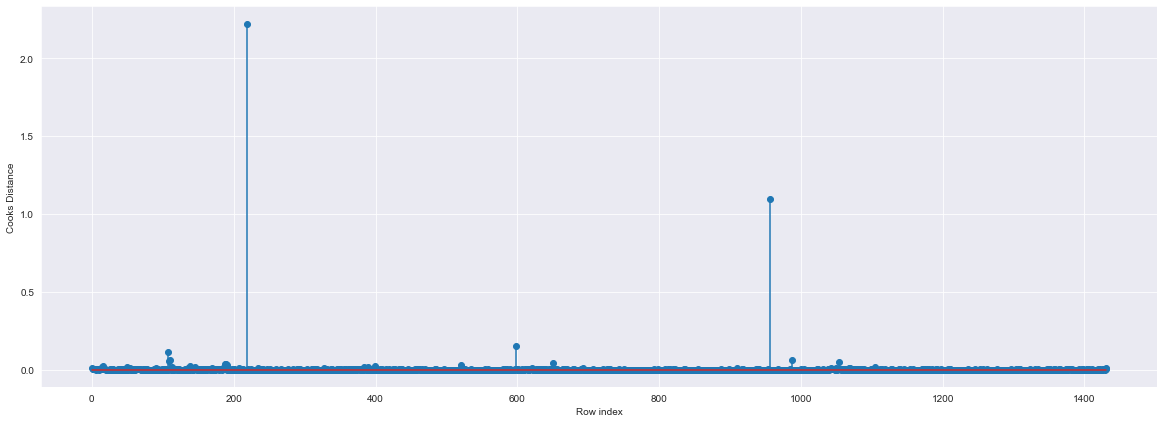

In [83]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cd_new1)),np.round(c_mod1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [85]:
(np.argmax(c_mod1),np.max(c_mod1))

(219, 2.2223476566754403)

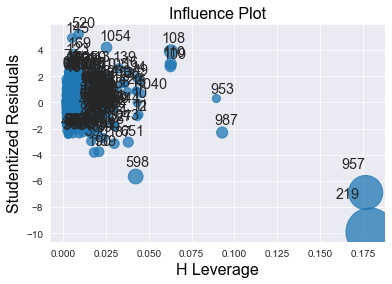

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [90]:
cd_new2=cd_new1.drop(cd_new1.index[[219,957]],axis=0)

In [96]:
cd_new3=cd_new2.reset_index()

In [97]:
cd_new4=cd_new3.drop(['index'],axis=1)

In [98]:
cd_new4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [100]:
model2 = smf.ols('Price~ Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cd_new4).fit()

In [101]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1356.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:57:24   Log-Likelihood:                -12200.
No. Observations:                1430   AIC:                         2.442e+04
Df Residuals:                    1421   BIC:                         2.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.465e+04   1436.278    -10.203      0.000   -1.75e+04   -1.18e+04
Age         -112.0685      2.482    -45.159      0.000    -116.937    -107.200
KM            -0.0170      0.001    -14.151      0.000      -0.019      -0.015
HP            36.6232      2.747     13.333      0.000      31.235      42.011
cc            -3.7782      0.303    -12.487      0.000      -4.372      -3.185
Doors       -119.6851     37.520     -3.190      0.001    -193.286     -46.085
Gears        466.1486    180.985      2.576      0.010     111.123     821.174
QT             5.1964      1.373      3.786      0.000       2.504       7.889
Weight        30.5186      1.296     23.554      0.000      27.977      33.060
==============================================================================
Omnibus:                      121.304   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.839
Skew:                          -0.079   Prob(JB):                    6.53e-153
Kurtosis:                       6.426   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
pred_y = model2.predict(cd_new1)

In [103]:
pred_y

0       16327.157706
1       15886.157877
2       16304.730219
3       15973.720719
4       15839.478680
            ...     
1427     9114.264775
1428     8499.110947
1429     8644.894673
1430     8758.662535
1431    10641.362723
Length: 1432, dtype: float64